# NumPy

In [337]:
import numpy as np
# просто сидим генератор случайных чисел, чтобы набор чисел был всегда одинаковый
np.random.seed(0)

In [338]:
# Создание массивов
# One-dimensional array
x1 = np.random.randint(10, size=6)
# Two-dimensional array
x2 = np.random.randint(10, size=(3, 4))
# Three-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))

Параметр `size` задаёт размерность массива. Причем сначала задаётся количество строк. Например, размерность `size=(3, 4, 5` означает, что в массиве будет 3 строки, в каждой строке будут 4 строки и каждая строка будет содержать 5 элементов. Это хорошо видно при распечатке массива `np.random.randint(10, size=(3, 4, 5))`

In [339]:
print(x1)
print("-" * 50)
print(x2)
print("-" * 50)
print(x3)

[5 0 3 3 7 9]
--------------------------------------------------
[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]
--------------------------------------------------
[[[8 1 5 9 8]
  [9 4 3 0 3]
  [5 0 2 3 8]
  [1 3 3 3 7]]

 [[0 1 9 9 0]
  [4 7 3 2 7]
  [2 0 0 4 5]
  [5 6 8 4 1]]

 [[4 9 8 1 1]
  [7 9 9 3 6]
  [7 2 0 3 5]
  [9 4 4 6 4]]]


## Свойства массивов

`ndim` - количество измерений (многомерность массива)   
`shape` - форма массива (размер каждого измерения)   
`size` - общее количество элементов массива    
`dtype` - тип элементов массива    
`itemsize` - размер одного элемента массива в байтах    
`nbytes` - размер всего массива в байтах

In [340]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)
print("x2 dtype: ", x2.dtype)
print("x3 itemsize ", x3.itemsize, " bytes")
print("x3 nbytes ", x3.nbytes, " bytes")

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60
x2 dtype:  int64
x3 itemsize  8  bytes
x3 nbytes  480  bytes


## Доступ к элементам

### Чтение

In [341]:
# Одномерный массив
x1[3]

3

In [342]:
# Многомерный массив. Схема доступа: строка1, ... строкаN, элементN
x3[1, 1, 2]

3

### Запись

In [343]:
print(x1)
x1[2] = 4
print(x1)

[5 0 3 3 7 9]
[5 0 4 3 7 9]


#### Запись элемента другого типа

При записи элементов другого типа они будут приведены к типу элементов массива. **Имейте ввиду, что при этом может происходить потеря точности!**

In [344]:
x4 = np.array([True, False, True, True])
print(x4)
x4[1] = 15
print(x4)

[ True False  True  True]
[ True  True  True  True]


### Slicing

In [345]:
# одномерные массивы
print(x1)
x1[1:3]

[5 0 4 3 7 9]


array([0, 4])

In [346]:
## многомерные массивы
print(x2)
x2[:2, :3]

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]


array([[3, 5, 2],
       [7, 6, 8]])

#### Доступ к колонкам или строка в многомерном массиве

In [347]:
print(x2[:, 0])  # first column of x2

[3 7 1]


In [348]:
print(x2[0, :])  # first row of x2

[3 5 2 4]


### Запись в подмассивы (слайсы)

**В отличие от Python, подмассивы (слайсы) `NumPy` предоставляют возможность записывать непосредственно в массив!!!**

Подмассив представляет собой `no-copy view` исходного массива, а не новый массив.

In [349]:
print(x2)

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]


In [350]:
x2_sub = x2[:2, :2]
print(x2_sub)

[[3 5]
 [7 6]]


In [351]:
x2_sub[0, 0] = 99
print(x2_sub)

[[99  5]
 [ 7  6]]


In [352]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


### Creating copies of arrays

In [353]:
# Можно воспользоваться методом `copy()`
# Если изменить копию, то оригинальный массив останется нетронутым!!!
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99  5]
 [ 7  6]]


## Изменение формы массива

In [354]:
grid = np.arange(1, 10)
print(grid)
grid2 = grid.reshape((3, 3))
print(grid2)

[1 2 3 4 5 6 7 8 9]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [355]:
## Еще один способ изменить форму массива - это использовать ключевое слово `np.newaxis` в операции среза
x = np.array([1, 2, 3])

# row vector via reshape
x.reshape((1, 3))

array([[1, 2, 3]])

In [356]:
# row vector via newaxis
x[np.newaxis, :]

array([[1, 2, 3]])

In [357]:
# column vector via reshape
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [358]:
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

## Соединение и разделение массивов

### Соединение массивов

In [359]:
# Метод `concatenate`
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
z = [91, 92, 93]
np.concatenate((x, y, z))

array([ 1,  2,  3,  3,  2,  1, 91, 92, 93])

In [360]:
# `concatenate` работает и на многомерных массивах

In [361]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

In [362]:
# concatenate along the first axis
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [363]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

Для работы с многомерными массивами, особенно с различной размерностью, намного более понятно использовать методы `np.vstack` (вертикальный стек) и `np.hstack` (горизонтальный стек).

In [364]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [365]:
# horizontally stack the arrays
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

### Разделение массивов

Разделение осуществляется функциями `np.split`, `np.hsplit`, и `np.vsplit`. Для каждой из этих функций мы можем передать список индексов, задающих точки разделения, а именно позиции в массиве, которые станут началами новых массивов.    
**Для N точек разделения всегда получается N+1 подмассивов.**

In [366]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])  # индексы 3 и 5 в исходном массиве являются точками разделения на массивы
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


Функции `np.hsplit` и `np.vsplit` работают следующим образом:

In [367]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [368]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [369]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


## Вычисления на массивах, универсальные функции

### Примеры ufuncs

In [370]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]
-x     =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]


### Абсолютные значения

In [371]:
x = np.array([-2, -1, 0, 1, 2])
print(abs(x))
print(np.abs(x))  # эквивалентная функция np.abs

[2 1 0 1 2]
[2 1 0 1 2]


### Тригонометрические функции

In [372]:
theta = np.linspace(0, np.pi, 3)

In [373]:
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [374]:
# Обратные функции также доступны
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x         =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


### Экспонента и логармфмы

In [375]:
# экспоненциальные функции
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x     = [1, 2, 3]
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]


In [376]:
# логарифмические функции
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


In [377]:
# Для очень маленьких значений существуют специальные функции, которые позволяют сохранить точность
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


## Продвинутые ufunc-функции

### Массив для вывода результатов

Иногда бывает полезно сохранить результаты вычислений в отдельный массив. Это возможно при использовании аргумента `out`.

In [378]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(x)
print(y)

[0 1 2 3 4]
[ 0. 10. 20. 30. 40.]


Можно даже указать в какие элементы массива нужно записать результаты. Например, в следующем примере результаты записываются в каждый второй элемент.

In [379]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


### Функции для аггрерирования

Например, для выполнения операции `reduce` (сокращение массива до одного элемента), мы можем вызвать метод `reduce` для каждой `ufunc`:

In [380]:
x = np.arange(1, 6)
np.add.reduce(x)

15

### Внешнее произведение (outer product)

Любая `ufunc` имеет метод `outer` для вычисления всех пар двух различных матриц (массивов) - **декартовое произведение матриц!!!**

In [381]:
x = np.arange(1, 6)
print(x)

print("Простое произведение значений:", np.multiply(x, x))
print("Внешнее произведение:\n", np.multiply.outer(x, x))

[1 2 3 4 5]
Простое произведение значений: [ 1  4  9 16 25]
Внешнее произведение:
 [[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]


### Сумма значений массива

In [382]:
L = np.random.random(100)
# sum(L) # так тоже можно
L.sum()

52.12818058833702

### Минимумы и максимумы

In [383]:
big_array = np.random.rand(1000000)

In [384]:
np.min(big_array), np.max(big_array)

(1.4057692298008462e-06, 0.9999994392723005)

In [385]:
big_array.min(), big_array.max()

(1.4057692298008462e-06, 0.9999994392723005)

### Агрегатные функции для многомерных данных

In [386]:
M = np.random.random((3, 4))
print(M)

[[0.50063048 0.07383653 0.49018646 0.72521956]
 [0.84926562 0.10226215 0.99559424 0.59250301]
 [0.53509    0.88518089 0.25518136 0.13130483]]


По умолчанию все агрегатные функции применяются ко всему массиву:

In [387]:
M.sum()

6.1362551272647154

Для работы с многомерными данными агрегатные функции имеют специальный аргумент `axis` для задания оси, вдоль которой будет применяться функция.

In [388]:
M.sum(axis=0)  # находит сумму для каждой колонки

array([1.88498609, 1.06127957, 1.74096206, 1.4490274 ])

In [389]:
M.min(axis=0) # находит минимальные значения в каждой колонки

array([0.50063048, 0.07383653, 0.25518136, 0.13130483])

In [390]:
# изменение оси приводит к из изменению результата расчета
M.min(axis=1)  # минимальные значения в каждом ряду

array([0.07383653, 0.10226215, 0.13130483])

In [391]:
M.max(axis=0) # находит максимальные значения в каждой колонке

array([0.84926562, 0.88518089, 0.99559424, 0.72521956])

### Прочие агрегатные функции

`NumPy` предоставляет множество агрегатных функций, в частности есть варианты для функций, которые работают с отсутствующими данными и возвращают `NaN`:

## Пример: какой средний рост у американских президентов

In [392]:
!head -4 notebooks/data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [393]:
import pandas as pd
data = pd.read_csv('notebooks/data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185 191 182]


In [394]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        180.04545454545453
Standard deviation: 6.983599441335736
Minimum height:     163
Maximum height:     193


In [395]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.75
Median:             182.0
75th percentile:    183.5


Можно попытаться сгенерировать изображение для визуального представления данных

In [396]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

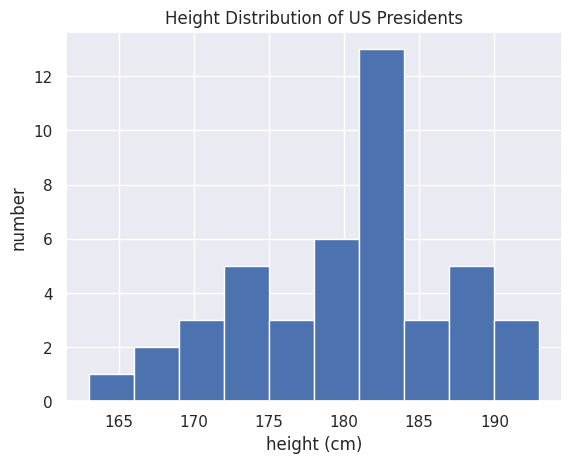

In [397]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

## Broadcasting

In [398]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting позволяет операции с массивами разной размерности. Например, мы легко можем добавить скалярную величину (представьте ее как массив с нулевой размерностью) к существующему массиву:

In [399]:
a + 5

array([5, 6, 7])

In [400]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [401]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Broadcasting как-бы дополняет одну матрицу до размерности другой, чтобы была возможность провести операцию.

![Broadcasting Visual](notebooks/figures/02.05-broadcasting.png)

### Правила broadcasting

Broadcasting в NumPy следует жесткому набору правил для определения порядка взаимодействия между двумя массивами:

    Правило 1: Если два массива различаются в размерности, форма массива с меньшей размерностью дополняется значениями его левой стороны.
    Правило 2: Если форма двух массивов различается в любых измерениях, массив с формой равной 1 в этом измерении, растягивается до измерения другого массива.
    Правило 3: Если по любому измерению размеры не совпадают и ни одно из измерений не равно 1, выбрасывается ошибка.

#### Пример 1

In [402]:
M = np.ones((2, 3))
a = np.arange(3)
print(M.shape)
print(a.shape)

(2, 3)
(3,)


In [403]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

#### Пример 2

In [404]:
a = np.arange(3).reshape((3, 1))
print(a)
b = np.arange(3)
print(b)

[[0]
 [1]
 [2]]
[0 1 2]


In [405]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

#### Пример 3

In [406]:
M = np.ones((3, 2))
print(M)
a = np.arange(3)
print(a)

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0 1 2]


In [407]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [ ]:
print(a.shape)
print(a[:, np.newaxis].shape)

In [ ]:
M + a[:, np.newaxis]

## Broadcasting на практике

Broadcasting является основой многих примеров из этой книги. Дальше приведены несколько операций в которых может быть полезен broadcasting.

### Центрирование массива

In [ ]:
X = np.random.random((10, 3))
print(X)

In [ ]:
Xmean = X.mean(0)
Xmean

In [ ]:
X_centered = X - Xmean
X_centered

In [ ]:
X_centered.mean(0)

### Отображение двумерной функции

Графическое отображение функции z = f(x, y)

In [ ]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar();

## Сравнения, маски и двоичная логика

### Пример: подсчёт дождливых дней

CSV файл содержит данные по дождливым дням в Сиэтле в 2014 году.

In [ ]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('notebooks_v1/data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
rainfall.shape

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

In [ ]:
plt.hist(rainfall, 40);

## Операторы сравнения как ufuncs

Результатом операций сравнения всегда является массив с элементами типа `bool`.

In [ ]:
x = np.array([1, 2, 3, 4, 5])

In [ ]:
x < 3

In [ ]:
x > 3

In [ ]:
x != 3

In [ ]:
x == 3

In [ ]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

In [ ]:
x < 6

## Работа с массивами с типом `bool`

In [ ]:
print(x)

### Подсчёт количества

In [ ]:
# how many values less than 6?
np.count_nonzero(x < 6)

Можно также использовать функцию `np.sum`. В этом случае `False` интерпретируется как 0, а `True` как 1.

In [ ]:
np.sum(x < 6)

Преимущество функции `np.sum` в том, что эта функция может осуществлять подсчёт вдоль рядов или колонок.

In [ ]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

Если нам надо узнать все ли элементы равны `True` или только часть `True`, то можно использовать функции `np.all` и `np.any`.

In [ ]:
# are there any values greater than 8?
np.any(x > 8)

In [ ]:
# are there any values less than zero?
np.any(x < 0)

In [ ]:
# are all values less than 10?
np.all(x < 10)

In [ ]:
# are all values equal to 6?
np.all(x == 6)

Функции `np.all` и `np.any` могут также использоваться для расчётов вдоль рядов или колонок.

In [ ]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

Т.е. в этом массиве все элементы в первом и третьем ряду меньше 8, в то время как во втором ряду это не так.

### Логические операторы

В NumPy есть операторы битовой логики `&`, `|`, `^`, и `~`.

In [ ]:
# Найти количество дней когда уровень осадков был более 0.5 дюймов, но меньше чем 1 дюйм.
np.sum((inches > 0.5) & (inches < 1))

In [ ]:
print("Number days without rain:\t", np.sum(inches == 0))
print("Number days with rain:\t\t", np.sum(inches != 0))
print("Days with more than 0.5 inches:\t", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches:\t", np.sum((inches > 0) & (inches < 0.2)))

## Двоичные массивы в качестве масок

Допустим мы хотим получить массив со значениями, которые меньше 5, для этого возьмём массив `x`:

In [ ]:
x = np.random.randint(10, size=(3, 4))
x

Мы можем легко получить двоичный массив с помощью оператора сравнения:

In [ ]:
x < 5

Чтобы получить из массива все значения меньше 5, мы можем просто провести индексирование на этом двоичном массиве; эта операция известна как _оператор маскирования_:

In [ ]:
x[x < 5]

В качестве результата возвращается одномерным массив, заполненные всеми значениями, которые удовлетворяют условию (x < 5). Другими словами, все значения на позициях которых двоичные маска-массив имеет значение `True`.

Таким образом мы получаем возможность обрабатывать данные так, как нам надо. Например, мы можем вычислить различные статистические данные для значение по Сиэттлу:

In [ ]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ", np.median(inches[rainy]))

print("Median precip on summer days in 2014 (inches):  ", np.median(inches[summer]))

print("Maximum precip on summer days in 2014 (inches): ", np.max(inches[summer]))

print("Median precip on non-summer rainy days (inches):", np.median(inches[rainy & ~summer]))

## Использование ключевых слов `and`/`or` или операторов `&`/`|`

Одна из частых точек для замешательства - это разница между ключевыми словами `and` и `or` с одной стороны, и операторами `&` и `|` с другой стороны.

Разница в том, что `and` и `or` определяют правду или лодь на основании всего объекта целиком, тогда как `&` и `|` работают с битами внутри каждого объекта.

Когда мы используем `and` или `or` - это как попросить Python обработать весь объект как одиночное булево значение. В Python, все ненулевые целые значения являются `True`. Таким образом:

In [ ]:
bool(42), bool(0)

In [ ]:
bool(42 and 0)

In [ ]:
bool(42 or 0)

Когда вы используете `&` и `|` на целочисленных значениях, выражение оперирует битами этого значения, применяя `and` или `or` к каждому биту, таким образом получая результат:

In [ ]:
bin(42)

In [ ]:
bin(59)

In [ ]:
bin(42 & 59)

In [ ]:
bin(42 | 59)

## Необычное индексирование

В отличие от доступа к элементам по скалярному индексу `x[5]`, необычное индексирование предполагает передачу целого массива индексов.

## Начала необычного индексирования

Необычное индексирование является концептуально простым: оно предполагает передачу массива индексов для доступа к множественным элементам исходного массива. Например:

In [410]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


Допустим мы хотим получить три различных элемента этого массива:

In [413]:
# традиционный подход
[x[3], x[7], x[4]]

[71, 86, 60]

In [412]:
# необычное индексирование
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

При использовании необычного индексирования, форма результата отражает форму массива индексов, а не исходного массива:

In [415]:
ind = np.array([[3, 7],
                [4, 5]])
# массив `x` является одномерным, однако результат получается двумерным
x[ind]

array([[71, 86],
       [60, 20]])

Необычное индексирование работает также для многомерных массивов:

In [417]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Также как и в обычном индексировании, первый индекс соответствует ряду, второй - колонке:

In [418]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

В данном премере получается, что первое значение равно `X[0,2]` (2), второе `X[1,1]` (5) и третье `X[2,3]` (11).

## Комбинированное индексирование

Для получение более мощных операций, необычное индексирование может быть скомбинировано с другими схемами индексирование, которые мы встречали раньше:

In [430]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


Из массива `X` извлечь элементы с индексами (2,2), (2,0) и (2,1):

In [432]:
X[2, [2, 0, 1]]

array([10,  8,  9])

Необычное индексирование может быть скомбинировано со срезами. Извлечь все данные из всех рядов, начиная с 1, для колонок 2, 0 и 1. Т.е. следующее выражение эквивалентно извлечениям: `X[1:, 2]`, `X[1:, 0]` и `X[1:, 1]`:

In [435]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

Также необычное индексирование может быть использовано совместно с маскированием:

# ЧТО ТУТ КОНКРЕТНО ПРОИСХОДИТ?

In [445]:
mask = np.array([1, 0, 1, 0], dtype=bool)
print(f"{row=}")
print("Reshaped `row`:", row[: ,np.newaxis])
X[row[:, np.newaxis], mask]

row=array([0, 1, 2])
Reshaped `row`: [[0]
 [1]
 [2]]


array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])